In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
from statistics import mode

In [6]:
def Train():
    ImagesArray = []
    myInt = float(255)
    jpg =".jpg"
    path = "Train/"
    for i in range(1,2401):
        name= str(i)
        name = name + jpg
        name = path + name
#         img = Image.open(name)
        img = mpimg.imread(name)
        np_img = np.array(img,dtype=float).flatten()     #Flattened each Image from 2D Array to 1D array
        np_img[:] = [x / myInt for x in np_img]
        ImagesArray.append(np_img)
        
   
    ImagesArray=np.array(ImagesArray)
    MeanArray=[]
    Col=0
    MeanMatrix=[]
    sum=0
    
    for z in range(1,785):             #Mean CMatrix Calculation
        CurrentCol=ImagesArray[ : , Col]
        for i in range(1,2401):
            if(i % 240 ==0 and i>0):
                mean=sum/240
                MeanArray.append(mean)
                sum=0
            else:
                sum=sum+CurrentCol[i]
        Col = Col +1
        MeanMatrix.append(MeanArray)
        MeanArray=[]
        
        
    MeanMatrix=np.array(MeanMatrix)
    CMM = MeanMatrix.transpose()  #CMM is corrected Mean Matrix 
  #  print(CMM[0])
  #  print(MeanMatrix[0])
  #  print(MeanMatrix.shape)
    
    StdArray=[]
    StdClass=[]
    Col=0
    StdMatrix=[]
    
    
    for z in range(1,785):             #Mean CMatrix Calculation
        CurrentCol=ImagesArray[ : , Col]
        for i in range(1,2401):
            if(i % 240 ==0):
                standard=np.std(StdClass)
                StdArray.append(standard)
                StdClass=[]
            else:
                StdClass.append(CurrentCol[i])
        Col = Col +1
        StdMatrix.append(StdArray)
        StdArray=[]
        
    StdMatrix=np.array(StdMatrix)    
  #  print(StdMatrix.shape)
    VMatrix=np.zeros((10,784))
    
    for i in range(0,10):
        for j in range(0,784):
            VMatrix[i][j]= StdMatrix[j][i]**2
            if( VMatrix[i][j] < 0.01):
                 VMatrix[i][j]=0.01
  #  print(VMatrix.shape)
    return CMM, VMatrix
            
        
        
    
            
    
    
   
        
        
    
        

In [7]:
Train()

(array([[1.30718954e-04, 7.02614379e-04, 5.71895425e-04, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [4.90196078e-05, 0.00000000e+00, 1.63398693e-04, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.02614379e-03, 2.25490196e-03, 2.10784314e-03, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [2.22222222e-03, 1.14379085e-03, 1.78104575e-03, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [6.69934641e-04, 7.51633987e-04, 2.45098039e-04, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.47058824e-04, 2.12418301e-04, 2.94117647e-04, ...,
         4.90196078e-05, 8.16993464e-05, 8.16993464e-05]]),
 array([[0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        ...,
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01

In [229]:
def Test():
    Mean, Variance =Train()
    TestImages=[]
    res=[]
    myInt=255
    jpg =".jpg"
    path = "Test/"
    pi=math.pi
    for i in range(1,201):
        name= str(i)
        name = name + jpg
        name = path + name
        img = mpimg.imread(name)
        np_img = np.array(img,dtype=float).flatten()     #Flattened each Image from 2D Array to 1D array
        np_img[:] = [x / myInt for x in np_img]
        TestImages.append(np_img)
    #print(TestImages[0])
    for i in range(0,200):
        CImg=TestImages[i]
        ImageGaussian=[]
        for j in range(0,784):
            CPixel=CImg[j]
            GaussianRes=[]
            for z in range(0,10):
                a=((CPixel-Mean[z][j])**2)/(2*(Variance[z][j]))
                e=math.exp(-a)
                GaussianRes.append((1/math.sqrt(2*pi*Variance[z][j])) * e)
     #       Klass = GaussianRes.index(max(GaussianRes))
            ImageGaussian.append(GaussianRes)
        res.append(ImageGaussian)
        
    ClassRes=[]
    GaussMult=np.ones((10,200))
    for i in range(0,200):
        CImg=res[i]
        for j in range(0,784):
            CPixel=CImg[j]
            for z in range(0,10):
                GaussMult[z][i]=GaussMult[z][i] * CPixel[z]
                
    CGM= GaussMult.transpose()
   
    for i in range(0,200):
        Klass = np.argmax(CGM[i])
        ClassRes.append(Klass)
        
    return ClassRes
        
    
                
                
    

In [228]:
Test()

C:\Users\Mostafa\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in double_scalars


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 6, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 8, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 9, 6, 2, 2, 2, 2, 2, 2, 8, 8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 4, 9, 4, 4, 6, 4, 6, 4, 4, 4, 4, 4, 9, 9, 6, 4, 4, 8, 4, 9, 8, 5, 8, 5, 5, 8, 5, 5, 5, 9, 4, 5, 5, 4, 5, 5, 5, 5, 5, 5, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 7, 9, 4, 9, 4, 9, 9, 7, 7, 4, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 0, 8, 8, 9, 8, 8, 8, 9, 9, 9, 0, 7, 9, 3, 8, 9, 9, 9, 9, 9, 9, 9, 4, 4, 4, 9, 9]


In [230]:
def Confused():
    result = Test()
    matrix =np.zeros((10,10))
    factor =0
    
    for i in range (0,10):
        for j in range (0 +factor,20 +factor):
            matrix[i][result[j]] =   matrix[i][result[j]] + 1
            
        factor +=20
        
        
    print(matrix)
    imgplot = plt.imshow(matrix)
    plt.savefig('Confusion.jpg')

C:\Users\Mostafa\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in double_scalars


[[18.  0.  0.  0.  0.  0.  1.  0.  1.  0.]
 [ 0. 20.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 16.  0.  0.  1.  1.  0.  1.  1.]
 [ 0.  0.  0. 17.  0.  1.  0.  0.  2.  0.]
 [ 0.  0.  0.  0. 12.  0.  3.  0.  1.  4.]
 [ 0.  0.  0.  0.  2. 14.  0.  0.  3.  1.]
 [ 0.  0.  0.  0.  0.  0. 19.  0.  1.  0.]
 [ 0.  0.  0.  0.  3.  0.  0. 12.  0.  5.]
 [ 1.  0.  0.  0.  0.  0.  0.  0. 18.  1.]
 [ 1.  0.  0.  1.  3.  0.  0.  1.  1. 13.]]


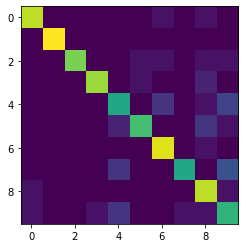

In [231]:
Confused()